# 14. Сегментация с помощью дистанционного преобразования

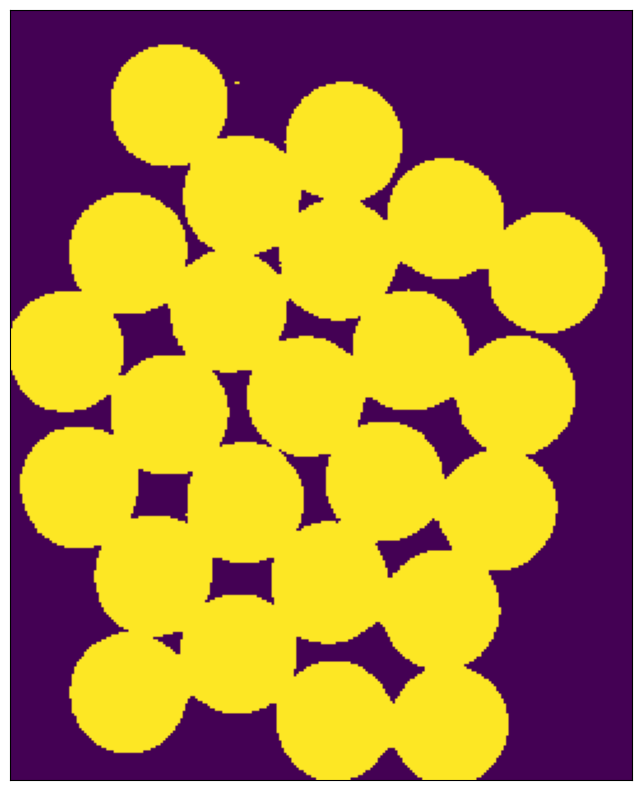

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def draw_img(img):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    ax.set(xticks=[],yticks=[],)
    ax.imshow(img)
    fig.tight_layout()
    plt.show()


img = cv.imread('water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
draw_img(thresh)

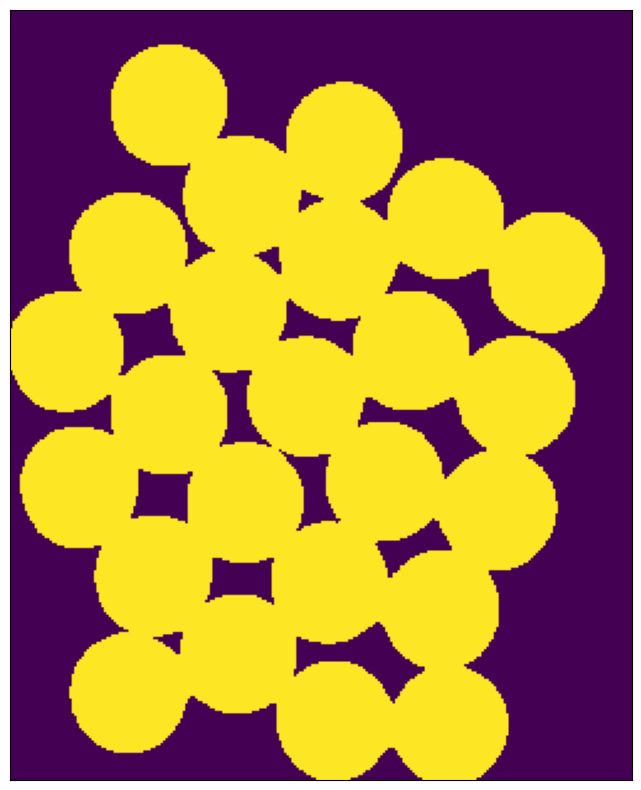

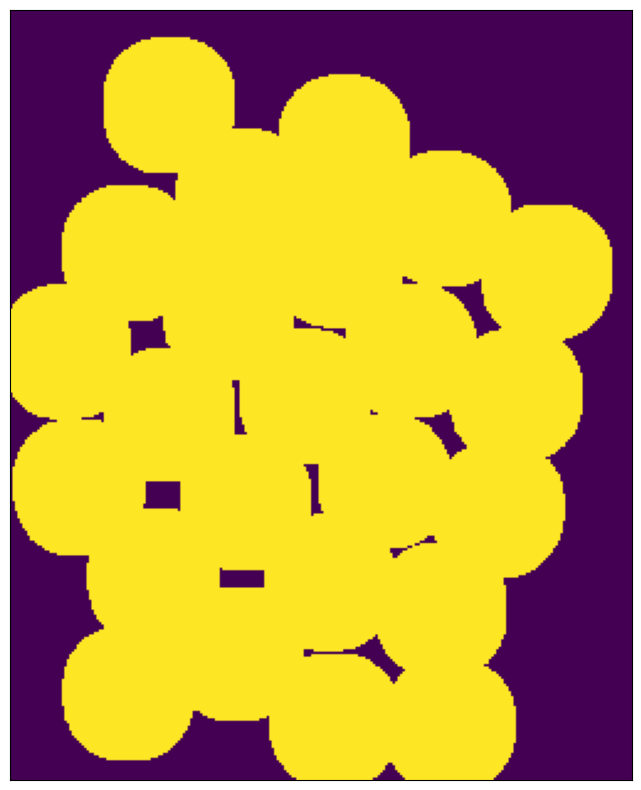

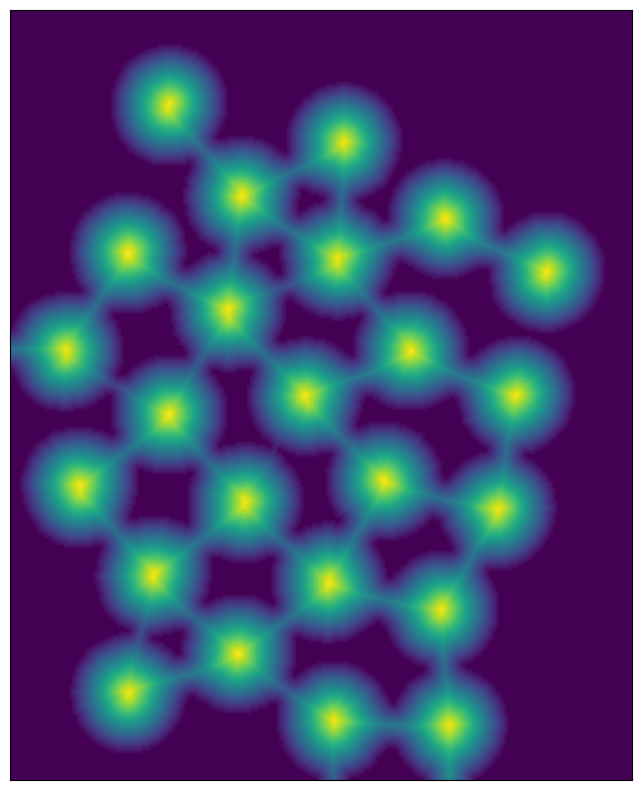

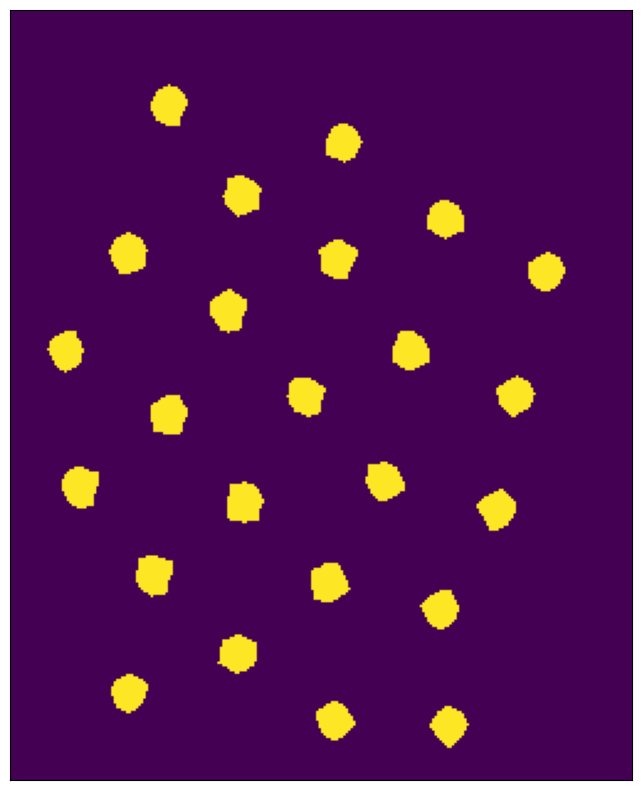

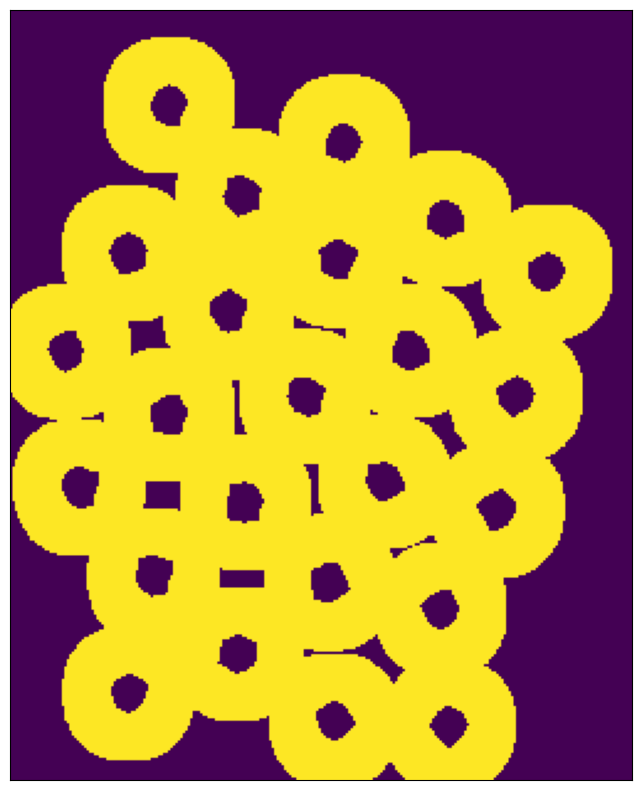

In [29]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
draw_img(opening)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
draw_img(sure_bg)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
draw_img(dist_transform)

ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
draw_img(sure_fg)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
draw_img(unknown)

(312, 252)


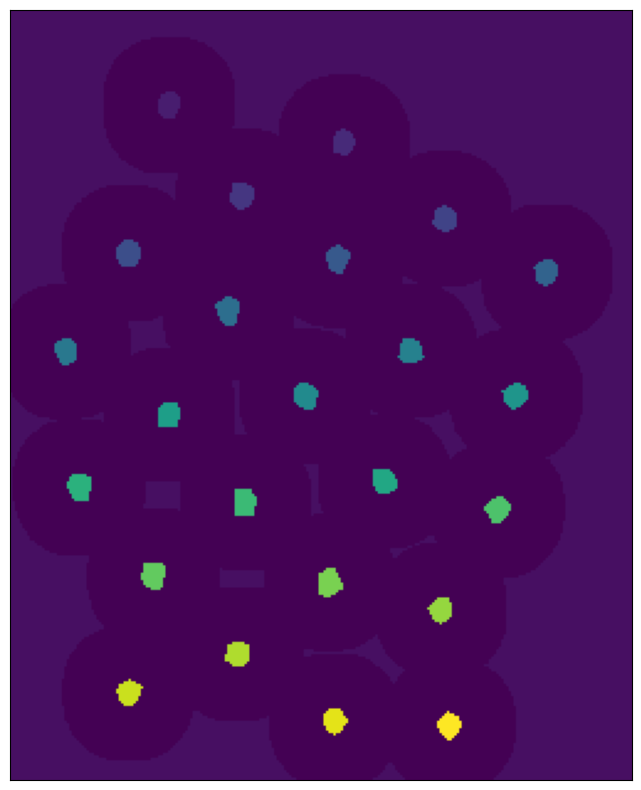

In [24]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
print(sure_fg.shape)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
draw_img(markers)

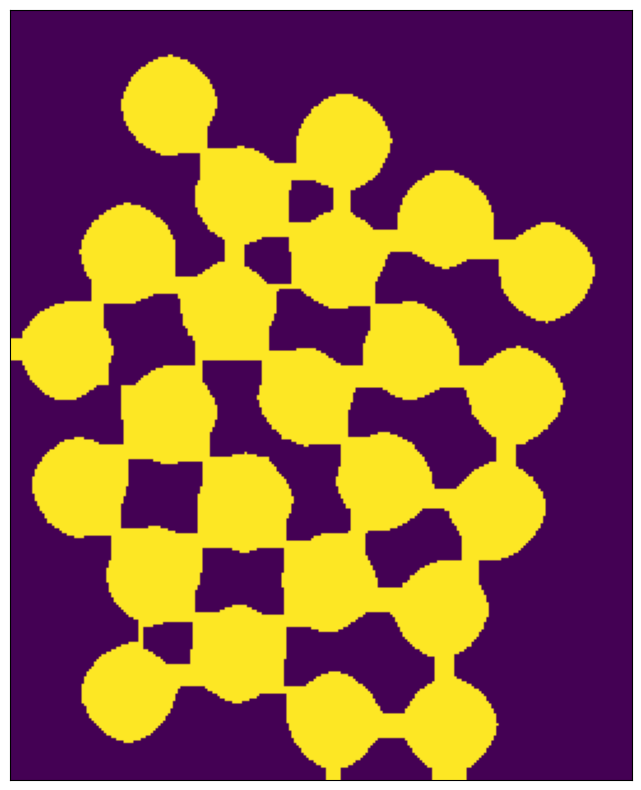

In [25]:

kernel = np.ones((9,9),np.uint8)
erosion = cv.morphologyEx(thresh,cv.MORPH_ERODE,kernel)
draw_img(erosion)

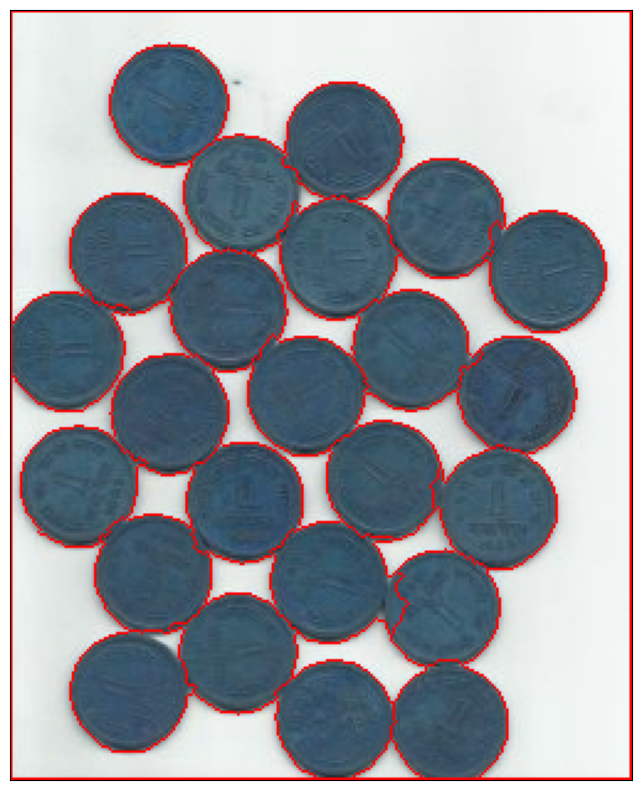

In [28]:

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
draw_img(img)